In [5]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np
import pathlib
from PIL import Image

In [2]:
print ('versão do tensor: {}'.format(tf.__version__))

versão do tensor: 2.4.0-dev20200709


In [3]:
diretorio = 'C:/Users/manuel/Documents/GitHub/Numbers_classification/numbers'
data_dir = pathlib.Path(diretorio)

lista = list(data_dir.glob('*/*.png'))
print ("Total de números: {}".format(len(lista)))

pastas = list(data_dir.glob('*'))
class_names = np.array([item.name for item in pastas if item.name != 'digitos.pde'])
print (class_names)

Total de números: 5100
['0' '1' '2' '3' '4' '5' '6' '7' '8' '9']


In [6]:
image_generator = keras.preprocessing.image.ImageDataGenerator(rescale = 1./255, validation_split=0.1)

train_data = image_generator.flow_from_directory(
    directory = diretorio,
    target_size = (100,100),
    batch_size = 40,
    shuffle = True,
    subset = 'training'
)

validation_data = image_generator.flow_from_directory(
    directory = diretorio,
    target_size = (100,100),
    subset = 'validation'
)

Found 4594 images belonging to 10 classes.
Found 506 images belonging to 10 classes.


In [21]:
TRAIN_STEPS = train_data.n // train_data.batch_size
VALIDATION_STEPS = validation_data.n // validation_data.batch_size

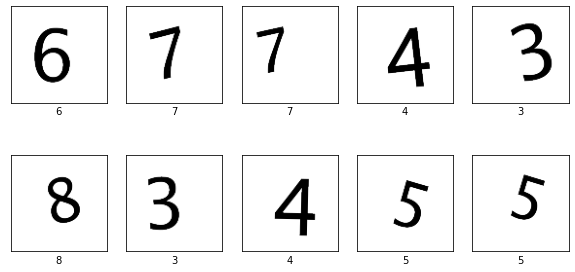

In [10]:
# desenhando algumas imagens do treino
plt.figure(figsize=(10,5))
images_batch, labels_batch = next(train_data)
for k in range(10):
    plt.subplot(2, 5, k+1)
    plt.imshow(images_batch[k])
    plt.xticks([])
    plt.yticks([])
    plt.xlabel(np.argmax(labels_batch[k]))
plt.show()

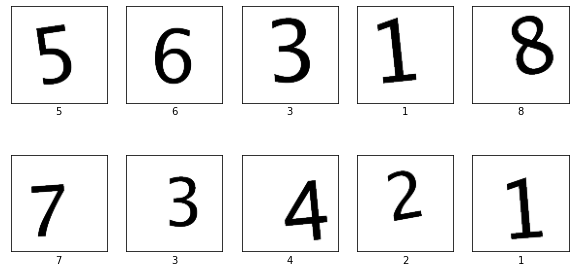

In [11]:

# desenhando algumas imagens da validação
plt.figure(figsize=(10,5))
images_batch, labels_batch = next(validation_data)
for k in range(10):
    plt.subplot(2, 5, k+1)
    plt.imshow(images_batch[k])
    plt.xticks([])
    plt.yticks([])
    plt.xlabel(np.argmax(labels_batch[k]))
plt.show()

In [24]:
model = keras.Sequential()

model.add(keras.layers.Conv2D(filters = 64, kernel_size=4, activation='relu'))
model.add(keras.layers.MaxPool2D(pool_size=2))
model.add(keras.layers.Dropout(rate = 0.2))

model.add(keras.layers.Flatten())

model.add(keras.layers.Dense(units = 256, activation='relu'))

model.add(keras.layers.Dense(units = 10, activation='softmax'))

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

parada_por_acuracia = keras.callbacks.EarlyStopping(monitor='val_accuracy', patience=2, verbose=1)

In [ ]:
model.fit_generator(
    generator = train_data,
    steps_per_epoch=TRAIN_STEPS,
    validation_data=validation_data,
    validation_steps = VALIDATION_STEPS,
    callbacks = [parada_por_acuracia],
    verbose=1
)